# Multiple Classification With Simple Neural Network

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
colnames=['AREA','PERIMETER','COMPACTNESS','LENGTH','WIDTH','ASSYMMETRY_COEFFICIENT','GROOVE_LENGTH','TYPE'] 
df = pd.read_csv('seeds_dataset.txt',  sep='\t', names= colnames )

In [ ]:
df.head()

,AREA,PERIMETER,COMPACTNESS,LENGTH,WIDTH,ASSYMMETRY_COEFFICIENT,GROOVE_LENGTH,TYPE
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [ ]:
df.TYPE.value_counts()

2.000    68
1.000    66
3.000    65
5.000     1
2.270     1
4.607     1
5.439     1
5.088     1
5.163     1
4.745     1
Name: TYPE, dtype: int64

In [ ]:
df.dtypes

AREA                      float64
PERIMETER                 float64
COMPACTNESS               float64
LENGTH                    float64
WIDTH                     float64
ASSYMMETRY_COEFFICIENT    float64
GROOVE_LENGTH             float64
TYPE                      float64
dtype: object

In [ ]:
df = df.dropna()

In [ ]:
train_set = df.iloc[:,:7]
test_set = df.iloc[:,7:]
test_set.head()

,TYPE
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
test_set = pd.get_dummies(test_set.TYPE)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_set, test_set,train_size=0.7, test_size=0.30)

In [ ]:
y_train.head()

,1.0,2.0,3.0
178,0,0,1
50,1,0,0
89,0,1,0
187,0,0,1
156,0,0,1


In [ ]:
df.TYPE.ndim

1

In [ ]:
# Describe Neural network
tf.random.set_seed = 42

model_1 = tf.keras.Sequential([
              tf.keras.layers.Dense(10, activation='relu'),
              tf.keras.layers.Dense(10, activation='relu'),
              tf.keras.layers.Dense(10, activation='relu'),
              tf.keras.layers.Dense(3,activation='softmax')

])

model_1.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics = ['accuracy'])

history_1 = model_1.fit(X_train,y_train, epochs=50)

Epoch 1/50
5/5 [==============================] - 1s 6ms/step - loss: 1.1828 - accuracy: 0.4101
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 1.0314 - accuracy: 0.4964
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 1.0101 - accuracy: 0.2878
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.9213 - accuracy: 0.5324
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 0.8968 - accuracy: 0.5252
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.8633 - accuracy: 0.5324
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 0.8153 - accuracy: 0.5396
Epoch 8/50
5/5 [==============================] - 0s 5ms/step - loss: 0.7683 - accuracy: 0.5899
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 0.7305 - accuracy: 0.5755
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 0.8170 - accuracy: 0.7194
Epoch 11/50
5/5 [======================

In [ ]:
tf.random.set_seed = 40
model_1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.2391 - accuracy: 0.8833


[0.2391117513179779, 0.8833333253860474]

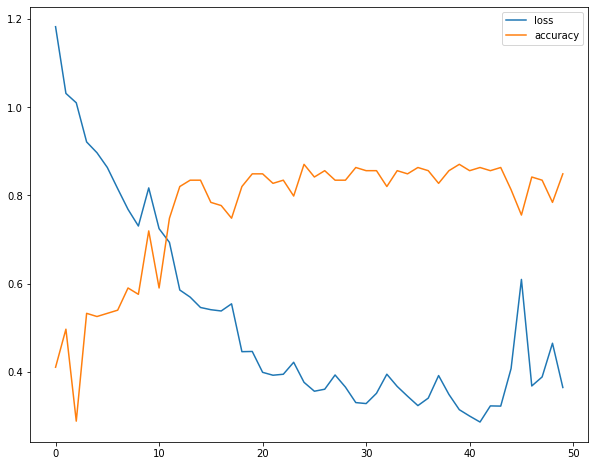

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10,8))

In [ ]:
y_probs = model_1.predict(X_test)
y_preds = y_probs.argmax(axis=1) 
y_preds

array([1, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 2])

In [ ]:
y_test, y_preds

(     1.0  2.0  3.0
 97     0    1    0
 119    0    1    0
 159    0    0    1
 184    0    0    1
 69     1    0    0
 164    0    0    1
 99     0    1    0
 1      1    0    0
 113    0    1    0
 71     0    1    0
 206    0    0    1
 67     1    0    0
 83     0    1    0
 131    0    1    0
 90     0    1    0
 33     1    0    0
 174    0    0    1
 36     1    0    0
 188    0    0    1
 143    0    0    1
 103    0    1    0
 175    0    0    1
 87     0    1    0
 74     0    1    0
 191    0    0    1
 183    0    0    1
 63     1    0    0
 186    0    0    1
 160    0    0    1
 85     0    1    0
 78     0    1    0
 163    0    0    1
 150    0    0    1
 104    0    1    0
 66     1    0    0
 167    0    0    1
 94     0    1    0
 2      1    0    0
 95     0    1    0
 92     0    1    0
 185    0    0    1
 93     0    1    0
 101    0    1    0
 171    0    0    1
 155    0    0    1
 129    0    1    0
 145    0    0    1
 168    0    0    1
 116    0    1    0


In [ ]:
df.TYPE

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
205    3.0
206    3.0
207    3.0
208    3.0
209    3.0
Name: TYPE, Length: 199, dtype: float64

In [ ]:
pwd


'/content'